# Wine Selection Challenge

The Field and Environmental Data Science team (FEDS) is keen to identify the very best wines available from a local distributor for our upcoming company party.  Fortunately, the distributor has a sense of our propensity for quantification, and thus has kept meticulous records on the rankings, quality, and characteristics of her stock.  She provided her dataset for our evaluation and to support our choice of wines for the upcoming party
 
Use the data set to identify wines for the party with the following characteristics:
1.	From which region are we most likely to find the highest quality wines?
2.	Please select 10 wines for the party.  What are they, and why did you select them?
3.	Which of the characteristics most influence wine quality?
4.	Despite his gruff exterior, it turns out that Matt Crisp, the CEO of Benson Hill, has a sweet tooth and that he only likes the sweetest of wines.  He also has knowledge of flavor and thus dislikes the “barnyard” features of wines with high free sulfur dioxide.  Taking into account Matt’s preferences, and all the other features of quality, which wine would you select for him?  Why?


## ANSWERS

1. The most highest quality wines come from Region C - 

In [132]:
print('7.6% of wines ranked at or above 7 out of total wines are in Region C')
print('45% of wines produced in Region C are ranked at or above 7')

7.6% of wines ranked at or above 7 out of total wines are in Region C
45% of wines produced in Region C are ranked at or above 7


2. Selected five top quality whites and five 8-ranked reds with lowest free sulfur (maybe CEO would like to try one? ;) - nevertheless, whites would have higher sulfur and sweetness

In [131]:
df_10wines

,color,region,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
ID,,,,,,,,,,,,,,
2374,white,B,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
2420,white,C,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
2427,white,F,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
2476,white,C,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
3205,white,C,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9
1404,red,C,7.2,0.33,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
279,red,G,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8
496,red,C,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
499,red,C,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8


3. Alcohol content.

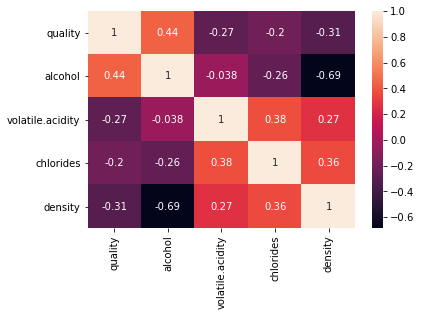

In [133]:
# calculating correlation matrix for all wines together
sns.heatmap(df_sel.corr(), annot = True)
plt.savefig('corr_heatmap5.png',dpi=300,transparent=False)

4. Wine for CEO. Below is the short list of best wines, if I would have to choose one, I would be bold and suggest him the 4381 - although ranked 6, but it is THE sweetest on the list and has very low free sulfur dioxide.
wine selection is a Personal choice and in many cases the expert ranking does not resonate with a personal palate.

In [134]:
ceo_3 = df1.iloc[[4402, 4380, 480], :]  # remember, Python indexes from 0, so in dframe indexes should be one less than desured IDs
ceo_3

,color,region,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
ID,,,,,,,,,,,,,,
4403,white,B,5.5,0.150,0.32,14.0,0.031,16.0,99.0,0.99437,3.26,0.38,11.5,8
4381,white,I,7.8,0.965,0.60,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
481,red,D,10.6,0.280,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.2,5


## APPROACH

**Note:** I used the simplest data mungling/visualization approach, utilizing Pandas, matplotlib, and seaborn Python modules for visualization and answering questions.
    Paper cited was aiming to develop a best model and parameters to help wine testers and abstract states that SVM model was performing better than NN and multiple regression, which is not surprising.
    I could certainly try to fit those models to answer question #3, but it seems as an overkill for the task and might not be easy to explain to business users in charge of purchasing wine.;)

**Also** while it makes sense to calculate statistics and fit models separetely for red/white and initially I did that, I then commented that routines out to simplify the report. 
The full calculations and statistics are exported in Excel file for further exploration if needed.

### Importing all needed Python modules for notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.preprocessing import StandardScaler

# below ensures complete display of big tables or graphs in notebook
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Getting Data, QA/QC

In [3]:
# reading provided CSV file as dataframe
df = pd.read_csv('WineData.csv')
print(df.shape)
df.head()

(6497, 16)


,Unnamed: 0,ID,color,region,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,1,red,I,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,2,red,E,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,3,red,A,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,4,red,E,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,5,red,I,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# data cleanup, dropping unnamed column and reaassigning ID (assuming those identify unique wines = 6497!) as index.
df = pd.read_csv('WineData.csv', index_col='ID')
col = list(df.columns)
print(col)

df1 = df.drop(columns=col[0])
df1.sample(3)

['Unnamed: 0', 'color', 'region', 'fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


,color,region,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
ID,,,,,,,,,,,,,,
1586,red,E,7.2,0.390,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,6
1972,white,E,6.6,0.905,0.19,0.8,0.048,17.0,204.0,0.99340,3.34,0.56,10.0,5
3616,white,C,6.3,0.410,0.33,4.7,0.023,28.0,110.0,0.99100,3.30,0.38,12.5,7


In [5]:
# new clean df1 with data summary stats table for all variables
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 1 to 6497
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 6497 non-null   object 
 1   region                6497 non-null   object 
 2   fixed.acidity         6497 non-null   float64
 3   volatile.acidity      6497 non-null   float64
 4   citric.acid           6497 non-null   float64
 5   residual.sugar        6497 non-null   float64
 6   chlorides             6497 non-null   float64
 7   free.sulfur.dioxide   6497 non-null   float64
 8   total.sulfur.dioxide  6497 non-null   float64
 9   density               6497 non-null   float64
 10  pH                    6497 non-null   float64
 11  sulphates             6497 non-null   float64
 12  alcohol               6497 non-null   float64
 13  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 761.4+ KB


There is 2 categorical variables (color and region), however, quality is listed as integer, caution must be excersized as it is technically a categorical variable

In [6]:
#making statistics of all the data as separate data frame
stats = df1.describe(include='all')  
#transposing statistics dataframe of the file with many columns to better display
st_trn = stats.transpose()
#displaying the statistics - made to display all columns from original file automatically
st_trn.head(df1.shape[1])

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
color,6497,2,white,4898,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,6497,9,F,1332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fixed.acidity,6497,NaN,NaN,NaN,7.21531,1.29643,3.8,6.4,7,7.7,15.9
volatile.acidity,6497,NaN,NaN,NaN,0.339666,0.164636,0.08,0.23,0.29,0.4,1.58
citric.acid,6497,NaN,NaN,NaN,0.318633,0.145318,0,0.25,0.31,0.39,1.66
residual.sugar,6497,NaN,NaN,NaN,5.44324,4.7578,0.6,1.8,3,8.1,65.8
chlorides,6497,NaN,NaN,NaN,0.0560339,0.0350336,0.009,0.038,0.047,0.065,0.611
free.sulfur.dioxide,6497,NaN,NaN,NaN,30.5253,17.7494,1,17,29,41,289
total.sulfur.dioxide,6497,NaN,NaN,NaN,115.745,56.5219,6,77,118,156,440
density,6497,NaN,NaN,NaN,0.994697,0.00299867,0.98711,0.99234,0.99489,0.99699,1.03898


## 1. From which region are we most likely to find the highest quality wines?

We can answer this question by exploring the dataset and calculating summary statistics for wine of highest ranks. 

In [7]:
# see how wines are distributed per rank in a whole dataset
df1['quality'].value_counts().sort_index()

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

since there only 5 wines ranked the highest "9" lets create a subset  and explore which regions they fall into

In [8]:
is_9 = df1['quality'] == 9
df_q9 = df1[is_9]
df_q9

,color,region,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
ID,,,,,,,,,,,,,,
2374,white,B,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
2420,white,C,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
2427,white,F,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
2476,white,C,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
3205,white,C,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9


In [9]:
# subsetting "8" quality wines
df_q8 = df1[df1['quality'] == 8]
df_q8.region.value_counts()

C    81
F    40
B    24
G    17
E    14
H    14
I     2
A     1
Name: region, dtype: int64

looks like region C scored 3 out of 5 highest quality wines and majority of "8" scored wines. Preliminary best region would be C, ut let's also subset "7" quality wines

In [10]:
# subsetting "7" quality wines
df_q7 = df1[df1['quality'] == 7]
df_q7.region.value_counts()

C    411
F    247
B    151
E     88
G     83
H     51
D     20
I     15
A     13
Name: region, dtype: int64

again, the answer is C. 

In [11]:
# calculating frequency of high quality wines per color and region
df_qGT7 = df1[df1['quality'] >=7]
#hq_stats = df_qGT7.groupby(['region', 'color'], as_index=False).agg({'quality': ["count", 'mean', 'std', min, 'median', max]})
hq_stats = df_qGT7.groupby(['region'], as_index=False).agg({'quality': ["count", 'mean', 'std', min, 'median', max]})

# concatenating two top rows of the dataframe for clean output
hq_stats.columns = ['_'.join(x) for x in hq_stats.columns.ravel()]

hq_stats

,region_,quality_count,quality_mean,quality_std,quality_min,quality_median,quality_max
0,A,14,7.071429,0.267261,7,7,8
1,B,176,7.147727,0.371553,7,7,9
2,C,495,7.175758,0.396618,7,7,9
3,D,20,7.000000,0.000000,7,7,7
4,E,102,7.137255,0.345816,7,7,8
5,F,288,7.145833,0.363275,7,7,9
6,G,100,7.170000,0.377525,7,7,8
7,H,65,7.215385,0.414288,7,7,8
8,I,17,7.117647,0.332106,7,7,8


In [12]:
# using Pandas Groupby method to calculate summary statitics per region

#quality_stats = df1.groupby(['region', 'color'], as_index=False).agg({'quality': ["count", 'mean', 'std', min, 'median', max]})
quality_stats = df1.groupby(['region'], as_index=False).agg({'quality': ["count", 'mean', 'std', min, 'median', max]})

# concatenating two top rows of the dataframe for clean output
quality_stats.columns = ['_'.join(x) for x in quality_stats.columns.ravel()]
quality_stats

,region_,quality_count,quality_mean,quality_std,quality_min,quality_median,quality_max
0,A,882,5.343537,0.588297,3,5,8
1,B,998,5.836673,0.801439,3,6,9
2,C,1092,6.380037,0.868686,3,6,9
3,D,334,5.386228,0.664810,3,5,7
4,E,785,5.670064,0.859778,3,6,8
5,F,1332,5.875375,0.873395,3,6,9
6,G,358,5.974860,0.965474,3,6,8
7,H,369,5.918699,0.810195,3,6,8
8,I,347,5.469741,0.734045,3,5,8


In [13]:
# merge the whole dataset summary with >=7 rank summary for more in-depth probability calculations
st_reg_merge = pd.merge(hq_stats, quality_stats, on=['region_'])
st_reg_merge

,region_,quality_count_x,quality_mean_x,quality_std_x,quality_min_x,quality_median_x,quality_max_x,quality_count_y,quality_mean_y,quality_std_y,quality_min_y,quality_median_y,quality_max_y
0,A,14,7.071429,0.267261,7,7,8,882,5.343537,0.588297,3,5,8
1,B,176,7.147727,0.371553,7,7,9,998,5.836673,0.801439,3,6,9
2,C,495,7.175758,0.396618,7,7,9,1092,6.380037,0.868686,3,6,9
3,D,20,7.000000,0.000000,7,7,7,334,5.386228,0.664810,3,5,7
4,E,102,7.137255,0.345816,7,7,8,785,5.670064,0.859778,3,6,8
5,F,288,7.145833,0.363275,7,7,9,1332,5.875375,0.873395,3,6,9
6,G,100,7.170000,0.377525,7,7,8,358,5.974860,0.965474,3,6,8
7,H,65,7.215385,0.414288,7,7,8,369,5.918699,0.810195,3,6,8
8,I,17,7.117647,0.332106,7,7,8,347,5.469741,0.734045,3,5,8


In [14]:
# calculating probabilities of high quality wines (rank >=7) per region
t_wines = 6497
st_reg_merge['hq_total'] = (st_reg_merge['quality_count_x'] / t_wines) * 100
st_reg_merge['hq_set'] = (st_reg_merge['quality_count_x'] / st_reg_merge['quality_count_y'] ) * 100
st_reg_merge

,region_,quality_count_x,quality_mean_x,quality_std_x,quality_min_x,quality_median_x,quality_max_x,quality_count_y,quality_mean_y,quality_std_y,quality_min_y,quality_median_y,quality_max_y,hq_total,hq_set
0,A,14,7.071429,0.267261,7,7,8,882,5.343537,0.588297,3,5,8,0.215484,1.587302
1,B,176,7.147727,0.371553,7,7,9,998,5.836673,0.801439,3,6,9,2.708943,17.635271
2,C,495,7.175758,0.396618,7,7,9,1092,6.380037,0.868686,3,6,9,7.618901,45.329670
3,D,20,7.000000,0.000000,7,7,7,334,5.386228,0.664810,3,5,7,0.307834,5.988024
4,E,102,7.137255,0.345816,7,7,8,785,5.670064,0.859778,3,6,8,1.569955,12.993631
5,F,288,7.145833,0.363275,7,7,9,1332,5.875375,0.873395,3,6,9,4.432815,21.621622
6,G,100,7.170000,0.377525,7,7,8,358,5.974860,0.965474,3,6,8,1.539172,27.932961
7,H,65,7.215385,0.414288,7,7,8,369,5.918699,0.810195,3,6,8,1.000462,17.615176
8,I,17,7.117647,0.332106,7,7,8,347,5.469741,0.734045,3,5,8,0.261659,4.899135


In [16]:
# merge the whole dataset summary with >=7 rank summary for more in-depth probability calculations
#stat_merge = pd.merge(hq_stats, quality_stats, on=['region_', 'color_'])
#stat_merge


In [127]:
# calculating probabilities of high quality wines (rank >=7) per red/white and region
t_wines = 6497
#stat_merge['hq_total'] = (stat_merge['quality_count_x'] / t_wines) * 100
#stat_merge['hq_set'] = (stat_merge['quality_count_x'] / stat_merge['quality_count_y'] ) * 100

File for swarmplot saved, you can continue!


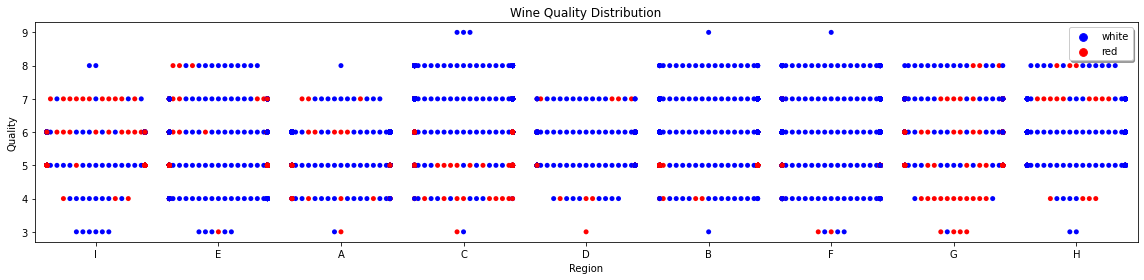

In [64]:
# Swarmplot for wine quality distribution
# Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(16,4))

_ = sns.swarmplot(x='region', y='quality', hue='color', data=df1, 
                 hue_order=['white', 'red'], palette=dict(white = 'b', red = 'r'), 
                 )
_ = plt.xlabel('Region')
_ = plt.ylabel ('Quality')
_ = plt.title ('Wine Quality Distribution')
#_ = plt.legend

ax.legend(loc='upper right', shadow=True)
fig.tight_layout()    
#plt.show()
plt.savefig('winequality_regions.png',dpi=300,transparent=False)
print('File for swarmplot saved, you can continue!')

## 2. Please select 10 wines for the party. What are they, and why did you select them?

Assuming that money is not an issue (and we do not have the information on prices). also assuming that people at the party have equal liking of white/red wines (preferences data on the guests is not available), let's aim for highest quality and equal representation of whites/reds. Selecting all five 9-ranked whites.
Lets find how many reds are in out of 193 8-ranked wines - according to swarmplot above, not very many. 

In [17]:
# getting info about white/red wines with "8" rank
df_q8.color.value_counts()

white    175
red       18
Name: color, dtype: int64

In [18]:
#  since there is only 18 reds with "8" rank, lets list them, but sort on free sulfur dioxide
df_q8_r = df_q8[df_q8['color'] =='red']

# sorting by free sulfide dioxide
dfq8r_s = df_q8_r.sort_values(by='free.sulfur.dioxide')

dfq8r_s

,color,region,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
ID,,,,,,,,,,,,,,
1404,red,C,7.2,0.33,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
279,red,G,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8
496,red,C,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
499,red,C,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
441,red,C,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
456,red,G,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
482,red,C,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8
1203,red,C,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8
1062,red,C,9.1,0.40,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8


In [19]:
# selecting first five reds out of the list
dfq8r_s5 = dfq8r_s.iloc[:5,:]
# merging those with 9-ranked whites
df_10wines = df_q9.append(dfq8r_s5)
df_10wines

,color,region,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
ID,,,,,,,,,,,,,,
2374,white,B,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
2420,white,C,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
2427,white,F,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
2476,white,C,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
3205,white,C,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9
1404,red,C,7.2,0.33,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
279,red,G,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8
496,red,C,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
499,red,C,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8


## 3. Which of the characteristics most influence wine quality?

In [20]:
# selecting just numerical columns for quick scatter plot and histogram matrix
df_num = df1.drop(columns = ['region'])
df_num.sample()

,color,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
ID,,,,,,,,,,,,,
1889,white,7.2,0.23,0.39,14.2,0.058,49.0,192.0,0.9979,2.98,0.48,9.0,7


File with scatterplot matrix saved!


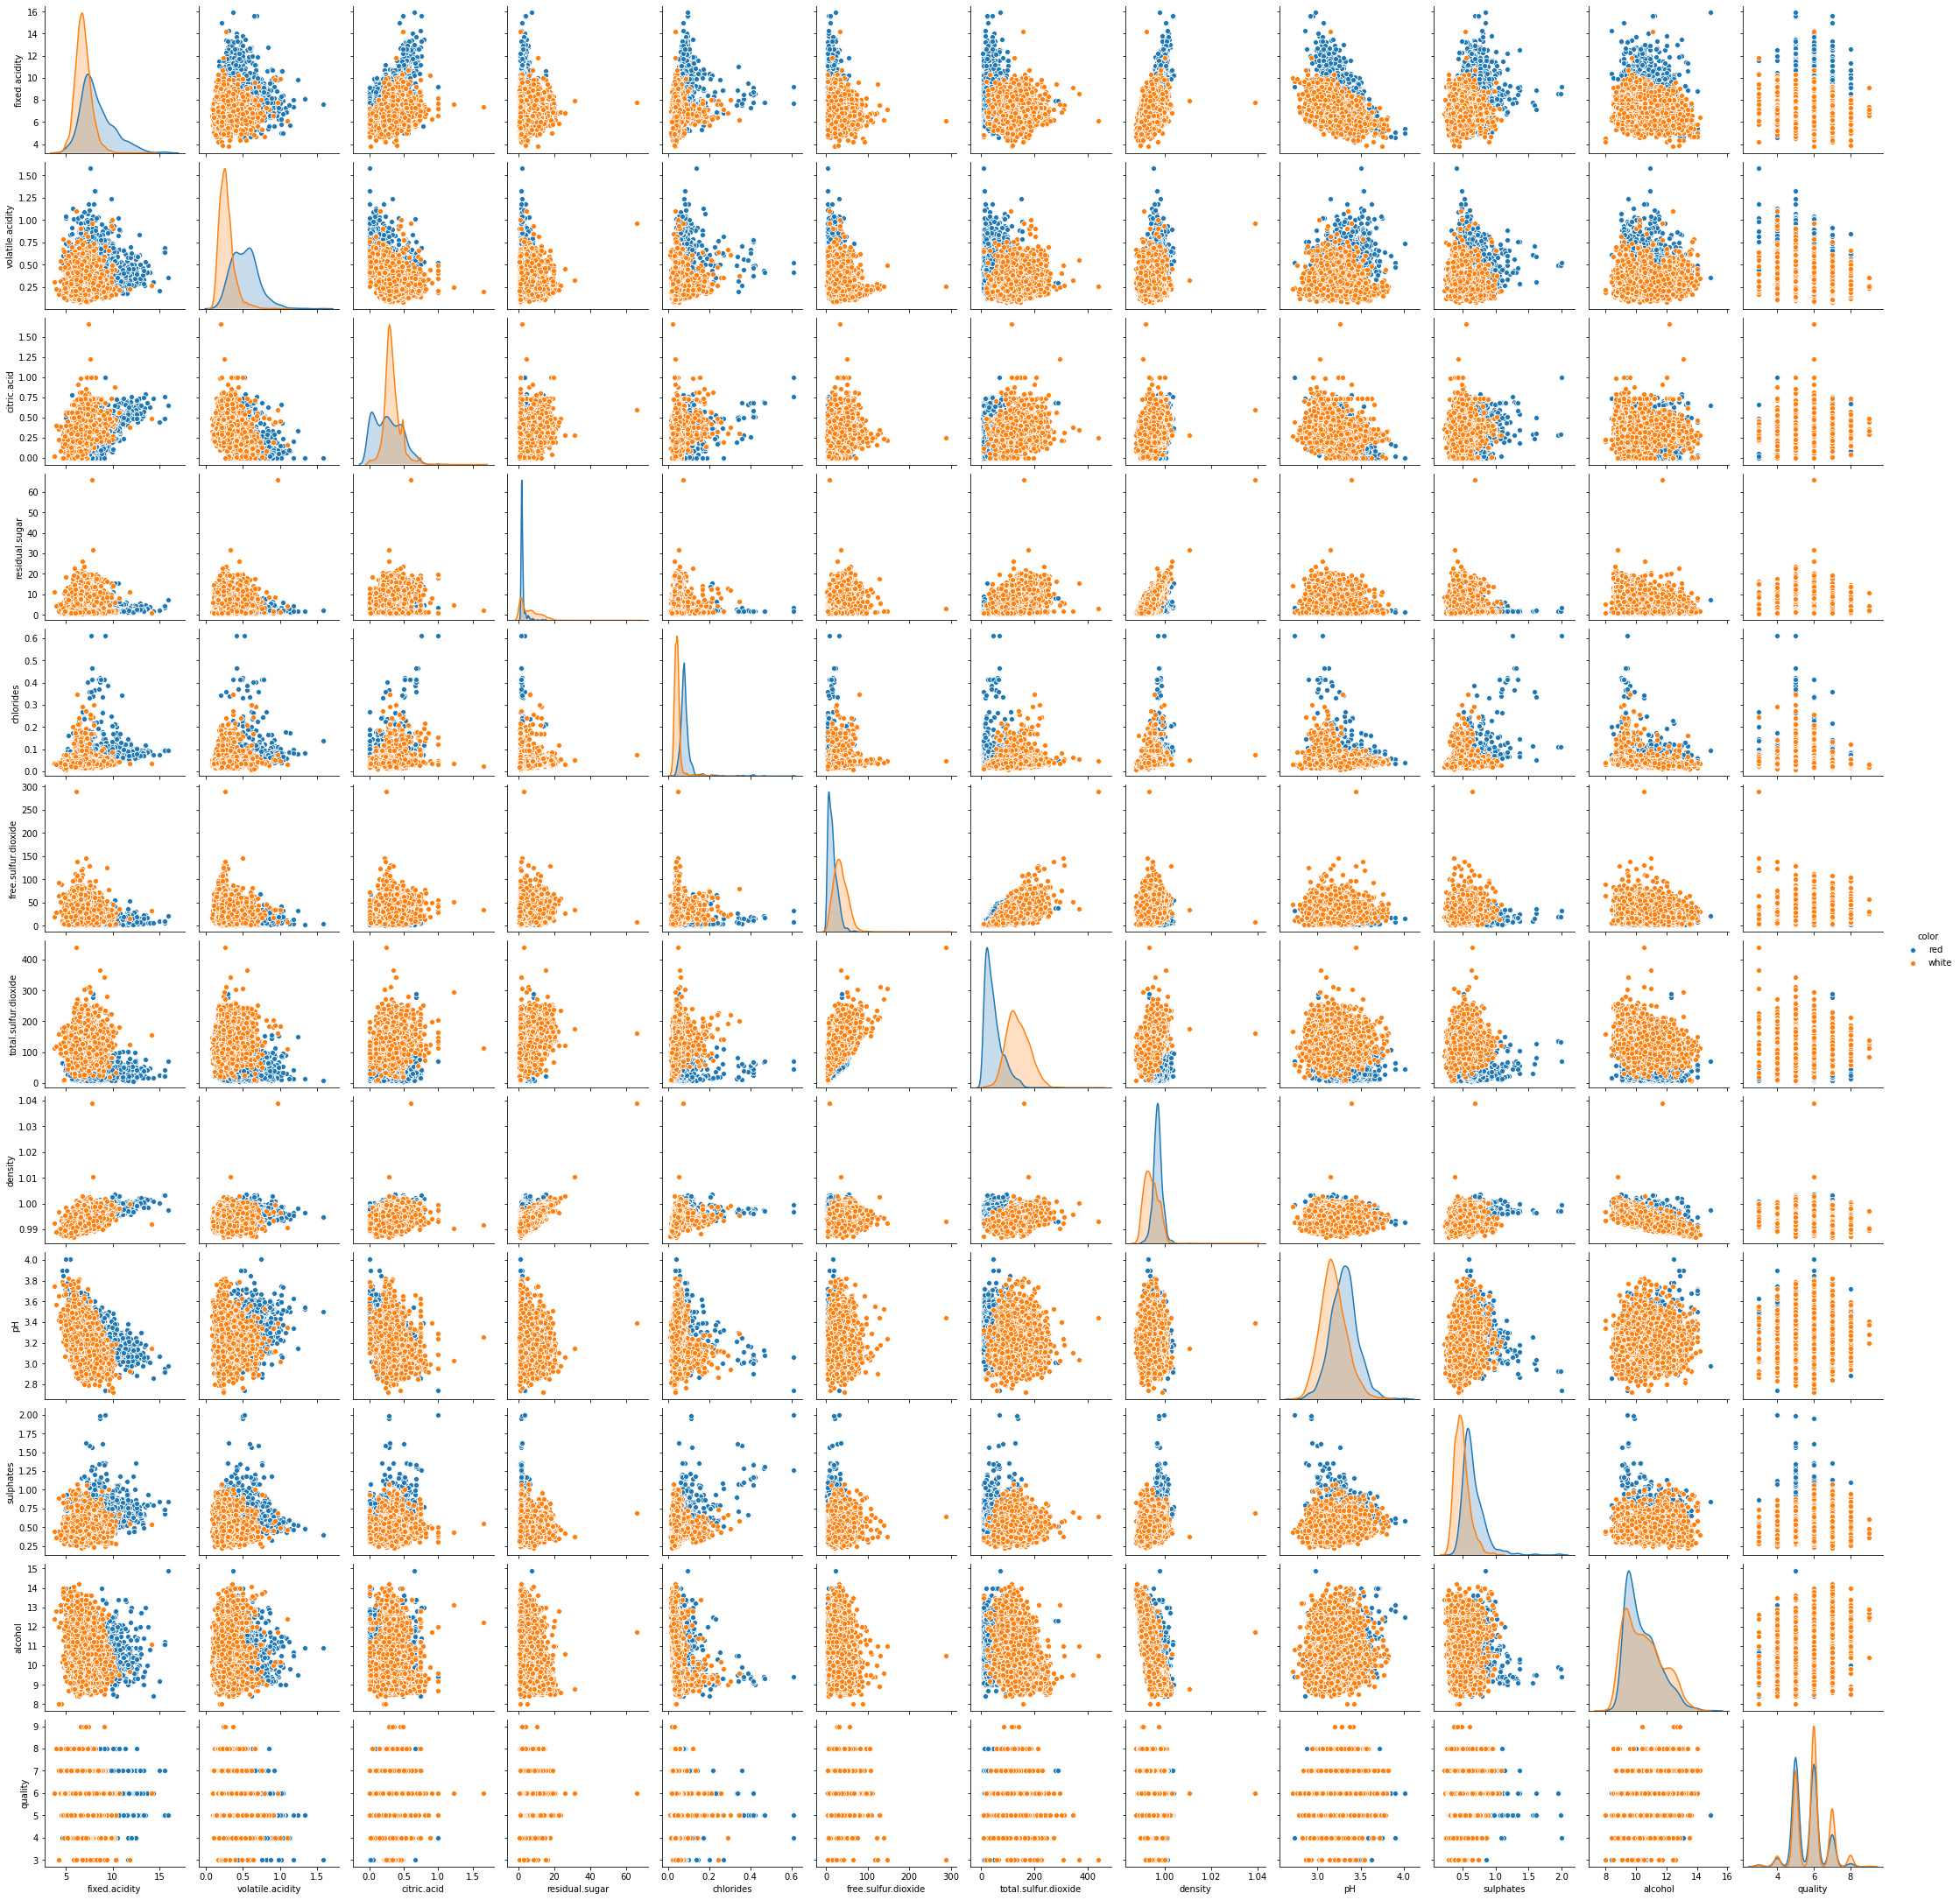

In [79]:
# now we can have the scatterplot of all pairwise wine parameters using "color" as separate for reds and whites
sns.pairplot(df_num, hue="color")
plt.savefig('wine_scatter.png',dpi=300,transparent=False)
print('File with scatterplot matrix saved!')

File with correlation heat map saved!


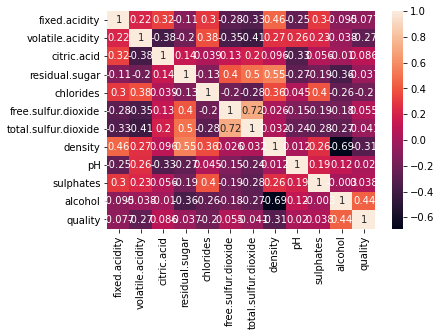

In [80]:
# calculating correlation matrix for all wines together
sns.heatmap(df_num.corr(), annot = True)
plt.savefig('corr_heatmap.png',dpi=300,transparent=False)
print('File with correlation heat map saved!')

In [21]:
# getting correlation table dataframe
df_corr = df_num.corr()

# sort by correlation with quality
corr_sort = df_corr.sort_values(by='quality', ascending=False)

corr_sort

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
quality,-0.076743,-0.265699,0.085532,-0.036980,-0.200666,0.055463,-0.041385,-0.305858,0.019506,0.038485,0.444319,1.000000
alcohol,-0.095452,-0.037640,-0.010493,-0.359415,-0.256916,-0.179838,-0.265740,-0.686745,0.121248,-0.003029,1.000000,0.444319
citric.acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
free.sulfur.dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
residual.sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
total.sulfur.dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
fixed.acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666


Interestingly, alcohol is the most correlated with quality (positively) and the other three properties (density, volatile acidity, chlorides) are negatively correlated. 
For the size of a dataset, those correlations are significant.
Selecting just those properties for smaller scatterplot matrix.

In [96]:
col_sel = ['color', 'region', 'quality', 'alcohol', 'volatile.acidity', 'chlorides', 'density']
print(col_sel)
df_sel = df1[col_sel]
print(df_sel.shape)
df_sel.sample()

['color', 'region', 'quality', 'alcohol', 'volatile.acidity', 'chlorides', 'density']
(6497, 7)


,color,region,quality,alcohol,volatile.acidity,chlorides,density
ID,,,,,,,
6467,white,E,6,13.0,0.6,0.031,0.98854


File with scatterplot matrix saved!


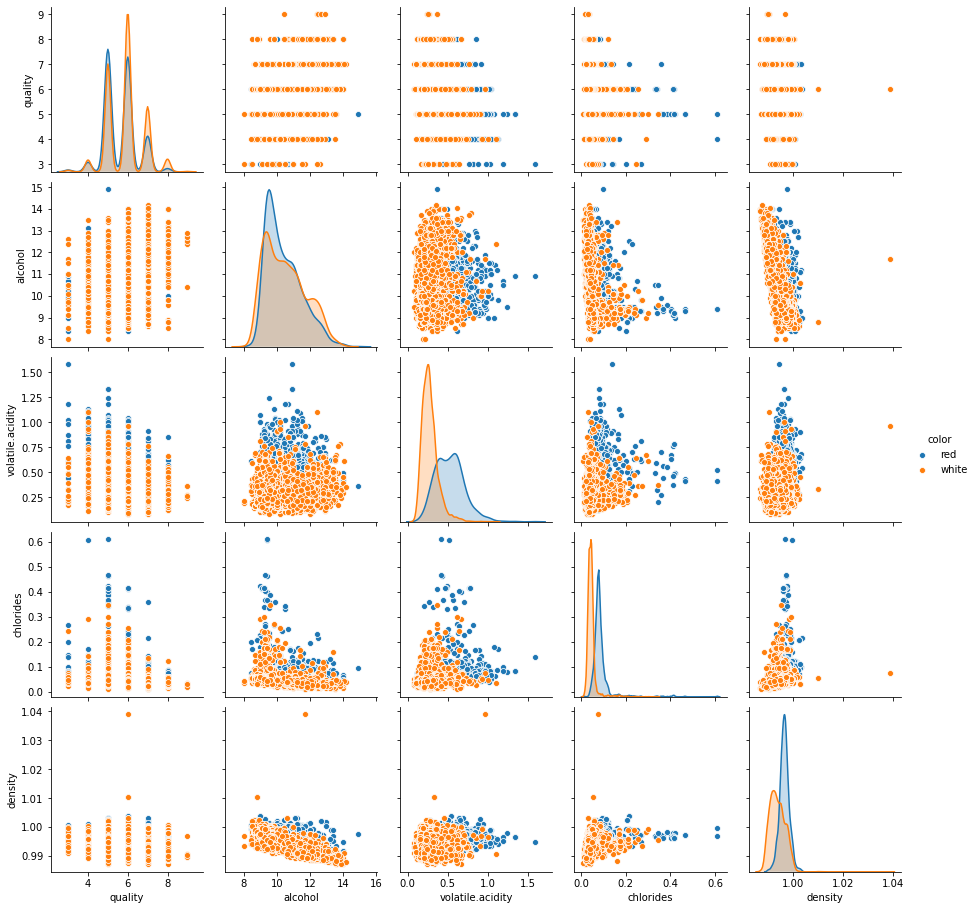

In [97]:
# scatterplot of 5 pairwise wine parameters using "color" as separate for reds and whites
sns.pairplot(df_sel, hue="color")
plt.savefig('wine_scatter_5.png',dpi=300,transparent=False)
print('File with scatterplot matrix saved!')

File with correlation heat map saved!


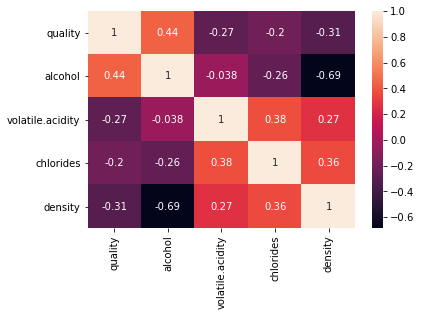

In [98]:
# calculating correlation matrix for all wines together
sns.heatmap(df_sel.corr(), annot = True)
plt.savefig('corr_heatmap5.png',dpi=300,transparent=False)
print('File with correlation heat map saved!')

**Note:** this is really not "proper way" to do correlation with "rank" variable of quality, just quick and preserves original units for the variables to interpret scatterplots visually, now let's scale all parameters and see if this would improve correlation.

In [114]:
# scaling all parameters per mean, creating a new df
df1.head(1)

,color,region,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
ID,,,,,,,,,,,,,,
1,red,I,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [177]:
# fitting SVM classifier
from sklearn import svm
fit_svm = svm.LinearSVC(dual=False).fit(X, Y)


## 4. Wine for CEO

Matt Crisp, the CEO of Benson Hill, has a sweet tooth and that he only likes the sweetest of wines. He also has knowledge of flavor and thus dislikes the “barnyard” features of wines with high free sulfur dioxide. Taking into account Matt’s preferences, and all the other features of quality, which wine would you select for him? Why?

In [137]:
# recall the properties of the whole dataset here
#st_trn.head(df1.shape[1])

to satisfy CEO's sweet tooth and awersion to sulfides, I would select a subset of wines with highest residial sugar (>= 75%), lowest sulfates  (<= 25%). 
Although those properties apparently do not influence wine rank according to experts, I would then try to find best ranked wines.

In [22]:
sel_ceo = df1[(df1['residual.sugar']>=8.1) & (df1['free.sulfur.dioxide']<=17)]
print(sel_ceo.shape)

(90, 14)


In [23]:
# as we know from inspection of the data before, those criteria would exculude all 9-ranked white wines
# best_ceo = sel_ceo[sel_ceo['quality']==9]  # this results in empty dframe

# how about 8-ranked wines?
best_ceo = sel_ceo[sel_ceo['quality']==8]
best_ceo

,color,region,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
ID,,,,,,,,,,,,,,
4403,white,B,5.5,0.15,0.32,14.0,0.031,16.0,99.0,0.99437,3.26,0.38,11.5,8


just one white wine here. Checking 7-ranked

In [24]:
# how about 7-ranked wines?
best_ceo = sel_ceo[sel_ceo['quality']==7]
best_ceo

,color,region,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
ID,,,,,,,,,,,,,,
2589,white,C,7.7,0.28,0.39,8.90,0.036,8.0,117.0,0.99350,3.06,0.38,12.0,7
4741,white,C,5.9,0.33,0.32,8.10,0.038,9.0,34.0,0.99110,3.22,0.36,12.7,7
4989,white,B,6.6,0.24,0.30,11.30,0.026,11.0,77.0,0.99381,3.13,0.55,12.8,7
5083,white,C,6.1,0.36,0.26,8.15,0.035,14.0,88.0,0.99031,3.06,0.27,13.0,7
5156,white,B,4.8,0.21,0.21,10.20,0.037,17.0,112.0,0.99324,3.66,0.48,12.2,7


In [25]:
# show top 10 wines with highest sugar
sel_ceo_sort = sel_ceo.sort_values(by='residual.sugar', ascending=False)
sel_ceo_sort.head(10)

,color,region,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
ID,,,,,,,,,,,,,,
4381,white,I,7.8,0.965,0.60,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
4623,white,E,7.0,0.450,0.34,19.8,0.040,12.0,67.0,0.99760,3.07,0.38,11.0,6
4614,white,E,7.0,0.450,0.34,19.8,0.040,12.0,67.0,0.99760,3.07,0.38,11.0,6
5634,white,D,6.8,0.270,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5
5632,white,D,6.8,0.270,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5
4143,white,D,6.5,0.230,0.25,17.3,0.046,15.0,110.0,0.99828,3.15,0.42,9.2,6
4136,white,D,6.5,0.230,0.25,17.3,0.046,15.0,110.0,0.99828,3.15,0.42,9.2,6
6060,white,D,6.6,0.180,0.26,17.3,0.051,17.0,149.0,0.99840,3.00,0.43,9.4,6
6054,white,D,6.6,0.180,0.26,17.3,0.051,17.0,149.0,0.99840,3.00,0.43,9.4,6


In [26]:
# separating white/red wines, in case there is suitable reds in a list and Matt prefers reds over whites
sel_ceo_r = sel_ceo[sel_ceo['color']=='red']
sel_ceo_r

,color,region,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
ID,,,,,,,,,,,,,,
325,red,D,10.0,0.49,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6
326,red,D,10.0,0.49,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6
481,red,D,10.6,0.28,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.2,5
912,red,D,9.1,0.28,0.46,9.0,0.114,3.0,9.0,0.99901,3.18,0.60,10.9,6
1236,red,D,6.0,0.33,0.32,12.9,0.054,6.0,113.0,0.99572,3.30,0.56,11.5,4


In [27]:
# wines for CEO - short list
ceo_3 = df1.iloc[[4402, 4380, 480], :]  # remember, Python indexes from 0, so in dframe indexes should be one less than desured IDs
ceo_3

,color,region,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
ID,,,,,,,,,,,,,,
4403,white,B,5.5,0.150,0.32,14.0,0.031,16.0,99.0,0.99437,3.26,0.38,11.5,8
4381,white,I,7.8,0.965,0.60,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
481,red,D,10.6,0.280,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.2,5


### Writing all cleaned data, summary statistics, etc to a single Excel file

In [29]:
# write all dataframes into one Excel file. 
with pd.ExcelWriter('WineAnalysis.xlsx') as writer:
    df1.to_excel(writer, sheet_name='All_wines', index=True)
#    stat_merge.to_excel(writer, sheet_name='Stats', index=False)
    st_reg_merge.to_excel(writer, sheet_name='Regions_stats', index=False)
    df_10wines.to_excel(writer, sheet_name='10w-party', index=True)
    ceo_3.to_excel(writer, sheet_name='3w-CEO', index=True)
        
# Close the Pandas Excel writer and output the Excel file.
writer.save()
writer.close()

print('Excel file saved')

Excel file saved


**Footnote** I learnt a lot about wine from this dataset. Impressive variety of wines tested and it is just from the one region of Portugal! If one tries a bottle a day it would take almost 20 years! ;)